# QUESTION


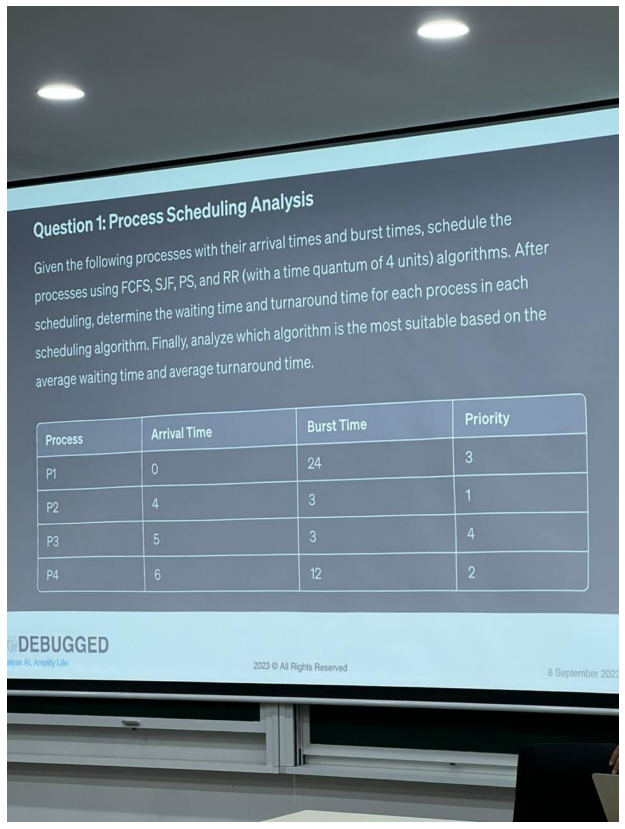

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'Image_1.jpg'  
img = mpimg.imread(image_path)
plt.figure(figsize=(15,15))  
plt.imshow(img)
plt.axis('off')
plt.show()

# FCFS SCHEDULING

In [2]:
 def fcfs_preemptive(arr):
    SIZE = len(arr)
    total_time = 0
    waiting_time = [0] * SIZE
    remaining_time = [process[2] for process in arr]

    print("FCFS Preemptive Scheduling (Shortest Remaining Time First):")
    print("Process\tWaiting Time\tTurnaround Time")

    while any(remaining_time):
        min_remaining_time = float("inf")
        min_index = -1

        for i in range(SIZE):
            if arr[i][1] <= total_time and remaining_time[i] < min_remaining_time and remaining_time[i] > 0:
                min_remaining_time = remaining_time[i]
                min_index = i

        if min_index == -1:
            total_time += 1
        else:
            remaining_time[min_index] -= 1
            total_time += 1

            if remaining_time[min_index] == 0:
                waiting_time[min_index] = total_time - arr[min_index][1]

    turnaround_time = [waiting_time[i] + process[2] for i, process in enumerate(arr)]
    avg_waiting_time = sum(waiting_time) / SIZE
    avg_turnaround_time = sum(turnaround_time) / SIZE

    for i in range(SIZE):
        print(f"{arr[i][0]}\t{waiting_time[i]}\t\t{turnaround_time[i]}")

    print(f"Average Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")

if __name__ == "__main__":
    processes_preemptive_fcfs = [
        ("P1", 0, 24, 3),
        ("P2", 4, 3, 1),
        ("P3", 5, 3, 4),
        ("P4", 6, 12, 2)
    ]

    fcfs_preemptive(processes_preemptive_fcfs)


FCFS Preemptive Scheduling (Shortest Remaining Time First):
Process	Waiting Time	Turnaround Time
P1	42		66
P2	3		6
P3	5		8
P4	16		28
Average Waiting Time: 16.5
Average Turnaround Time: 27.0


# SJF(PREEMTIVE) SCHEDULING

In [3]:
def SJF_preemptive(processes):
    n = len(processes)
    remaining_time = [process['burst_time'] for process in processes]
    completion_time = [0] * n
    current_time = 0
    total_completed = 0
    wt = [0] * n
    tat = [0] * n

    while total_completed < n:
        min_remaining_time = float('inf')
        min_process_index = -1

        for i in range(n):
            if (
                processes[i]['arrival_time'] <= current_time
                and remaining_time[i] < min_remaining_time
                and remaining_time[i] > 0
            ):
                min_remaining_time = remaining_time[i]
                min_process_index = i

        if min_process_index == -1:
            current_time += 1
            continue

        # Execute the selected process for 1 time unit
        remaining_time[min_process_index] -= 1
        current_time += 1

        if remaining_time[min_process_index] == 0:
            total_completed += 1
            completion_time[min_process_index] = current_time
            wt[min_process_index] = completion_time[min_process_index] - processes[min_process_index]['burst_time'] - processes[min_process_index]['arrival_time']
            tat[min_process_index] = completion_time[min_process_index] - processes[min_process_index]['arrival_time']

    # Calculate the average waiting time and average turnaround time
    avg_waiting_time = sum(wt) / n
    avg_turnaround_time = sum(tat) / n

    return wt, tat, avg_waiting_time, avg_turnaround_time

if __name__ == "__main__":
    processes = [
        {"name": "P1", "arrival_time": 0, "burst_time": 24, "priority": 3},
        {"name": "P2", "arrival_time": 4, "burst_time": 3, "priority": 1},
        {"name": "P3", "arrival_time": 5, "burst_time": 3, "priority": 4},
        {"name": "P4", "arrival_time": 6, "burst_time": 12, "priority": 2},
    ]

    wt, tat, avg_waiting_time, avg_turnaround_time = SJF_preemptive(processes)

    print("Process\tWaiting Time\tTurnaround Time")
    for i in range(len(processes)):
        print(f"{processes[i]['name']}\t{wt[i]}\t\t{tat[i]}")

    print(f"Average Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")


Process	Waiting Time	Turnaround Time
P1	18		42
P2	0		3
P3	2		5
P4	4		16
Average Waiting Time: 6.0
Average Turnaround Time: 16.5


# PRIORITY SCHEDULING

In [4]:
def PS(processes):
    n = len(processes)
    wt = [0] * n
    tat = [0] * n
    processes_sorted = sorted(processes, key=lambda x: (x['priority'], x['arrival_time']))
    completion_time = processes_sorted[0]['arrival_time']

    for i in range(n):
        if completion_time < processes_sorted[i]['arrival_time']:
            completion_time = processes_sorted[i]['arrival_time']
        wt[processes.index(processes_sorted[i])] = completion_time - processes_sorted[i]['arrival_time']
        completion_time += processes_sorted[i]['burst_time']
        tat[processes.index(processes_sorted[i])] = wt[processes.index(processes_sorted[i])] + processes_sorted[i]['burst_time']

    return wt, tat

if __name__ == "__main__":
    processes = [
        {"name": "P1", "arrival_time": 0, "burst_time": 24, "priority": 3},
    {"name": "P2", "arrival_time": 4, "burst_time": 3, "priority": 1},
    {"name": "P3", "arrival_time": 5, "burst_time": 3, "priority": 4},
    {"name": "P4", "arrival_time": 6, "burst_time": 12, "priority": 2}
    ]


    wt, tat = PS(processes)

    print("Process\tWaiting Time\tTurnaround Time")
    for i in range(len(processes)):
        print(f"{processes[i]['name']}\t{wt[i]}\t\t{tat[i]}")

    avg_waiting_time = sum(wt) / len(processes)
    avg_turnaround_time = sum(tat) / len(processes)

    print(f"Average Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")


Process	Waiting Time	Turnaround Time
P1	19		43
P2	0		3
P3	38		41
P4	1		13
Average Waiting Time: 14.5
Average Turnaround Time: 25.0


# ROUND ROBIN SCHEDULING (Time Quantum=4)

In [5]:


from collections import deque

def preemptiveRoundRobin(processes, quantum):
    n = len(processes)
    remaining_time = [process[2] for process in processes]
    waiting_time = [0] * n
    turnaround_time = [0] * n
    time = 0
    queue = deque()

    while True:
        for i in range(n):
            if processes[i][1] <= time and remaining_time[i] > 0:
                if remaining_time[i] > quantum:
                    time += quantum
                    remaining_time[i] -= quantum
                    queue.append(i)
                else:
                    time += remaining_time[i]
                    waiting_time[i] = time - processes[i][1] - processes[i][2]
                    remaining_time[i] = 0
                    turnaround_time[i] = waiting_time[i] + processes[i][2]

        done = True
        for i in range(n):
            if remaining_time[i] > 0:
                done = False
                break

        if done:
            break

        # Rotate the queue to handle other processes
        queue.append(queue.popleft())

    total_waiting_time = sum(waiting_time)
    total_turnaround_time = sum(turnaround_time)
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n

    print("Preemptive Round Robin Scheduling:")
    print("Process\tWaiting Time\tTurnaround Time")

    for i in range(n):
        print(f"{processes[i][0]}\t{waiting_time[i]}\t\t{turnaround_time[i]}")

    print(f"Average Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")

if __name__ == "__main__":
    processes = [
        ("P1", 0, 24, 3),
        ("P2", 4, 3, 1),
        ("P3", 5, 3, 4),
        ("P4", 6, 12, 2)
    ]
    quantum = 4

    preemptiveRoundRobin(processes, quantum)


Preemptive Round Robin Scheduling:
Process	Waiting Time	Turnaround Time
P1	18		42
P2	0		3
P3	2		5
P4	12		24
Average Waiting Time: 8.0
Average Turnaround Time: 18.5
